In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('D:/Users/ehern/Desktop/CS 4661 Data Science/Project/healthcare/train_data.csv')
df_test = pd.read_csv('D:/Users/ehern/Desktop/CS 4661 Data Science/Project/healthcare/test_data.csv')

In [3]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [5]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Department'], 
            prefix='Department')], axis=1).drop(['Department'],axis=1)
df_train.reset_index(drop=True, inplace=True)

df_train = pd.concat([df_train,pd.get_dummies(df_train['Type of Admission'], 
                prefix='Admission')], axis=1).drop(['Type of Admission'],axis=1)
df_train.reset_index(drop=True, inplace=True)

In [6]:
def normalize(df):
    
  labelencoder = LabelEncoder()

  df['Bed Grade'] = labelencoder.fit_transform(df['Bed Grade'])

  df['City_Code_Patient'] = labelencoder.fit_transform(df['City_Code_Patient'])

  df['Admission_Deposit'] = labelencoder.fit_transform(df['Admission_Deposit'])

  hrc = df['Hospital_region_code'].unique()
  new_hrc = dict(zip(hrc, range(len(hrc))))
  df['Hospital_region_code'].replace(new_hrc, inplace=True)

  ward = df['Ward_Type'].unique()
  new_ward = dict(zip(ward, range(len(ward))))
  df['Ward_Type'].replace(new_ward, inplace=True)

  wfc = df['Ward_Facility_Code'].unique()
  new_wfc = dict(zip(wfc, range(len(wfc))))
  df['Ward_Facility_Code'].replace(new_wfc, inplace=True)

  soi = df['Severity of Illness'].unique()
  new_soi = dict(zip(soi, range(len(soi))))
  df['Severity of Illness'].replace(new_soi, inplace=True)

  age = df['Age'].unique()
  new_age = dict(zip(age, range(len(age))))
  df['Age'].replace(new_age, inplace=True)

  htc = df['Hospital_type_code'].unique()
  new_htc = dict(zip(htc, range(len(htc))))
  df['Hospital_type_code'].replace(new_htc, inplace=True)

In [7]:
normalize(df_train)
normalize(df_test)

In [8]:
stay_list = df_train['Stay'].unique()
stay_dict = dict(zip(stay_list, range(len(stay_list))))
df_train['Stay'].replace(stay_dict, inplace=True)

In [9]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,1,8,0,3,0,3,0,0,1,31397,...,2954,0,0,0,0,1,0,1,0,0
1,2,2,0,5,0,2,1,0,1,31397,...,3997,1,0,0,0,1,0,0,1,0
2,3,10,1,1,1,2,1,1,1,31397,...,2788,2,0,1,0,0,0,0,1,0
3,4,26,2,2,2,2,0,2,1,31397,...,5315,1,0,0,0,1,0,0,1,0
4,5,26,2,2,2,2,1,2,1,31397,...,3601,1,0,0,0,1,0,0,1,0


In [10]:
df_train.dtypes

case_id                              int64
Hospital_code                        int64
Hospital_type_code                   int64
City_Code_Hospital                   int64
Hospital_region_code                 int64
Available Extra Rooms in Hospital    int64
Ward_Type                            int64
Ward_Facility_Code                   int64
Bed Grade                            int64
patientid                            int64
City_Code_Patient                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int64
Admission_Deposit                    int64
Stay                                 int64
Department_TB & Chest disease        uint8
Department_anesthesia                uint8
Department_gynecology                uint8
Department_radiotherapy              uint8
Department_surgery                   uint8
Admission_Emergency                  uint8
Admission_Trauma                     uint8
Admission_U

In [11]:
features = ["Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Hospital_region_code", "Available Extra Rooms in Hospital", "Ward_Type", "Ward_Facility_Code", "Bed Grade", "City_Code_Patient", "Severity of Illness", "Visitors with Patient", "Age", "Admission_Deposit", "Department_TB & Chest disease", "Department_anesthesia", "Department_gynecology", "Department_radiotherapy", "Department_surgery", "Admission_Emergency", "Admission_Trauma", "Admission_Urgent"]

In [12]:
X = df_train[features]
y = df_train['Stay']
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Severity of Illness,...,Age,Admission_Deposit,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,8,0,3,0,3,0,0,1,6,0,...,0,2954,0,0,0,1,0,1,0,0
1,2,0,5,0,2,1,0,1,6,0,...,0,3997,0,0,0,1,0,0,1,0
2,10,1,1,1,2,1,1,1,6,0,...,0,2788,0,1,0,0,0,0,1,0
3,26,2,2,2,2,0,2,1,6,0,...,0,5315,0,0,0,1,0,0,1,0
4,26,2,2,2,2,1,2,1,6,0,...,0,3601,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,3,6,1,3,2,0,3,21,1,...,3,2187,0,0,0,1,0,1,0,0
318434,24,3,1,1,2,2,1,3,7,1,...,4,4742,0,1,0,0,0,0,0,1
318435,7,3,4,1,3,0,0,3,9,2,...,1,2278,0,0,1,0,0,1,0,0
318436,11,2,2,2,3,2,2,2,7,2,...,7,1804,0,1,0,0,0,0,1,0


# KNN

#### KNN by splitting the data:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

newK = [22]
for k in newK:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(accuracy*100,'%')

27.752969180813846 %


In [14]:
y_predict_prob_knn = knn.predict_proba(X_test)

print(y_predict_prob_knn)

[[0.22727273 0.         0.         ... 0.         0.         0.        ]
 [0.04545455 0.04545455 0.09090909 ... 0.         0.         0.        ]
 [0.13636364 0.04545455 0.18181818 ... 0.         0.         0.        ]
 ...
 [0.04545455 0.         0.36363636 ... 0.         0.         0.        ]
 [0.04545455 0.09090909 0.09090909 ... 0.         0.         0.        ]
 [0.04545455 0.         0.18181818 ... 0.         0.         0.        ]]


#### True Positive Rate (TPR) and False Positive Rate (FPR):

In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 6.52124295e-06 1.43467345e-04 5.80390622e-04
 2.93455933e-03 1.43467345e-02 6.34777789e-02 2.11170889e-01
 5.49460367e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.51208716e-04
 5.78821927e-03 2.55362615e-02 8.93769152e-02 2.79026217e-01
 6.20701396e-01 1.00000000e+00]


#### AUC

In [16]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5474942440372343


#### ROC Curve

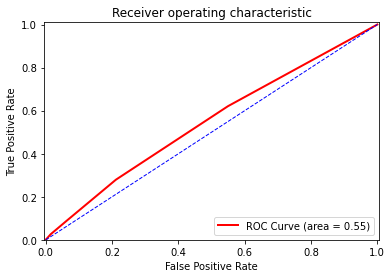

In [17]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### KNN using cross-validation:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

k = 22
my_knn = KNeighborsClassifier(n_neighbors=k)
accuracy_list = cross_val_score(my_knn, X, y, cv=10, scoring='accuracy')

accuracy = accuracy_list.mean()

print(accuracy*100,'%')

28.47335627638905 %


# Logistic Regression

#### Logistic Regression by splitting the data:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

my_logreg = LogisticRegression(max_iter = 7000)
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_lr)

print(accuracy*100,'%')

36.36123829442466 %


C:\Users\ehern\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)

print(y_predict_prob_lr)

[[1.32652625e-01 4.36954770e-02 1.12488312e-01 ... 1.31594698e-02
  1.12964774e-02 1.00792346e-02]
 [9.53872439e-03 2.84930894e-02 2.94409741e-01 ... 4.21838928e-02
  1.00849432e-02 1.27273426e-02]
 [8.16996225e-02 3.81431300e-02 1.46256553e-01 ... 4.99530308e-03
  5.00094104e-03 2.48488970e-03]
 ...
 [2.12477674e-01 1.70479542e-02 8.46186646e-02 ... 1.38465983e-03
  2.33619021e-03 1.38588473e-03]
 [2.81048771e-03 2.29016219e-09 2.92445570e-03 ... 2.45559529e-08
  3.62173516e-09 2.40996923e-09]
 [1.35436457e-01 2.93289446e-02 1.63591032e-01 ... 7.36694161e-03
  6.16173365e-03 5.92746664e-03]]


#### True Positive Rate (TPR) and False Positive Rate (FPR):

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 6.52124295e-06 5.21699436e-05 ... 9.99915224e-01
 9.99915224e-01 1.00000000e+00]
[0.         0.         0.         ... 0.99982976 1.         1.        ]


#### AUC:

In [22]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5658980709077593


#### ROC Curve

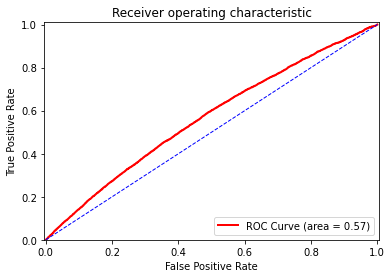

In [23]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Linear Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
accuracy = my_linreg.score(X_test,y_test)

print(accuracy*100,'%')

8.864395817016069 %


In [26]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5658980709077593


In [27]:
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
y_pred = my_linreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
304486,0,2.726924
315372,6,4.557171
158271,3,3.274910
3608,10,4.034682
13536,5,3.310354
...,...,...
37477,5,3.382429
202675,2,4.422520
204564,3,2.507451
112491,7,1.382902


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-3.20947585 -3.21920032 -3.28317066 -3.38592368 -3.29505285 -3.24762162
 -3.316233   -3.36786307 -3.35255226 -3.34740042]

[1.791501   1.79421301 1.81195217 1.84008795 1.81522804 1.80211587
 1.82105272 1.83517385 1.83099761 1.82959023]

1.8171912467072873


# Decision Tree

#### Decision Tree by splitting the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(accuracy*100,'%')

29.251534050584414 %


In [30]:
y_predict_prob_dt = my_decisiontree.predict_proba(X_test)

print(y_predict_prob_dt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


#### True Positive Rate (TPR) and False Positive Rate (FPR):

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.03825361 0.03826013 1.        ]
[0.         0.06996936 0.06996936 1.        ]


#### AUC

In [32]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5158548401960756


#### ROC Curve

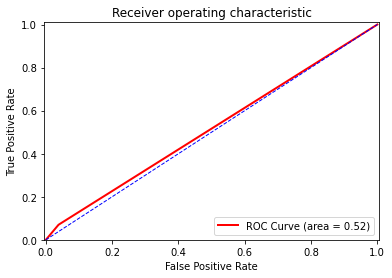

In [33]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### Decision Tree using cross-validation

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

my_decisiontree = DecisionTreeClassifier()
accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')
accuracy = accuracy_list.mean()

print(accuracy*100,'%')

28.88348107640898 %


# Random Forest

#### Random Forest by splitting the data:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True)
rand_forest.fit(X_train, y_train)
y_predict = rand_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(accuracy*100,'%')

37.62867496969583 %


In [36]:
y_predict_prob_rf = rand_forest.predict_proba(X_test)

print(y_predict_prob_rf)

[[0.24 0.02 0.12 ... 0.   0.   0.  ]
 [0.   0.   0.1  ... 0.06 0.02 0.05]
 [0.24 0.   0.16 ... 0.   0.   0.  ]
 ...
 [0.04 0.   0.   ... 0.   0.   0.  ]
 [0.03 0.02 0.16 ... 0.   0.03 0.09]
 [0.13 0.06 0.25 ... 0.03 0.   0.  ]]


#### True Positive Rate (TPR) and False Positive Rate (FPR):

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 6.52124295e-06 3.91274577e-05 5.86911865e-05
 6.52124295e-05 9.12974013e-05 1.23903616e-04 2.15201017e-04
 2.67370961e-04 3.19540904e-04 3.97795820e-04 4.43444521e-04
 5.21699436e-04 5.99954351e-04 6.97772996e-04 8.21676612e-04
 9.32537742e-04 1.04339887e-03 1.12165379e-03 1.23251492e-03
 1.35641853e-03 1.43467345e-03 1.57161955e-03 1.74117187e-03
 1.91072418e-03 2.11288272e-03 2.24982882e-03 2.42590238e-03
 2.66066712e-03 2.88891063e-03 3.08454791e-03 3.37800385e-03
 3.55407741e-03 3.87361831e-03 4.20620170e-03 4.46053018e-03
 4.81267730e-03 5.13873944e-03 5.14526069e-03 5.68000261e-03
 6.17561707e-03 6.64514656e-03 7.13423979e-03 7.81897030e-03
 7.82549154e-03 8.58847696e-03 9.34494115e-03 1.02253089e-02
 1.02318302e-02 1.12426228e-02 1.12491441e-02 1.23055854e-02
 1.35641853e-02 1.48814764e-02 1.64400535e-02 1.82464378e-02
 1.82594803e-02 2.02615018e-02 2.25048094e-02 2.25113307e-02
 2.51915615e-02 2.51915615e-02 2.82304607e-02 2.82369820e-02
 3.17454107e-02 3.175845

#### AUC

In [38]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.6209977639375109


#### ROC Curve

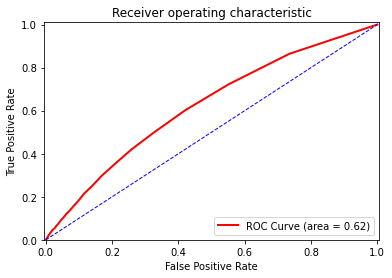

In [39]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### Random Forest using cross-validation:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)


rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True)
accuracy_list = cross_val_score(rand_forest, X, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print(accuracy*100,'%')

37.62867496969583 %


# Matplot

<function matplotlib.pyplot.show(*args, **kw)>

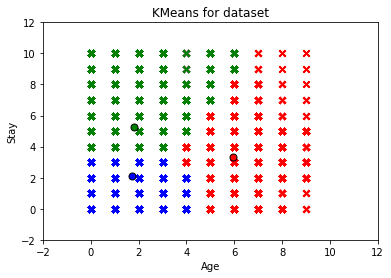

In [41]:
%matplotlib inline

features = features = ['Age','Stay']

X = df_train[features]

# Clustering:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(X)

# Assigned Labels after clustering: 
labels = my_KMeans.labels_

# Centers of the clusters:
centers = my_KMeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-2, 12])
plt.ylim([-2, 12])

# Labels, Title, Legend:
plt.xlabel('Age')
plt.ylabel('Stay')
plt.title('KMeans for dataset')

plt.show